## Simple dataset : creation and visualization

Todo: 

* define exercises
   * pca then t-SNE (timeit)
   * try the 3 clustering techniques on the various datasets from scikit-learn / openml?
     * list the datasets
* read t-SNE paper and explain it
* mention manifold learning: the dimensionality of datasets is only artificially high

### 2D

In [1]:
import sklearn.datasets

In [2]:
data, labels = sklearn.datasets.make_blobs(n_samples=1000)

In [3]:
data.shape

(1000, 2)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

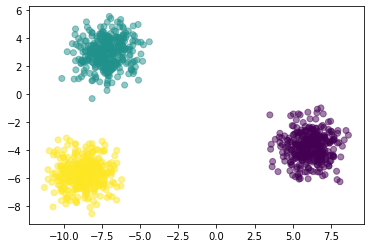

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.5)

### 3D

In [180]:
data, labels = sklearn.datasets.make_blobs(n_samples=1000, 
                                           n_features=3, 
                                           centers=[[0,0,0], [2,2,0], [0,0,5]])

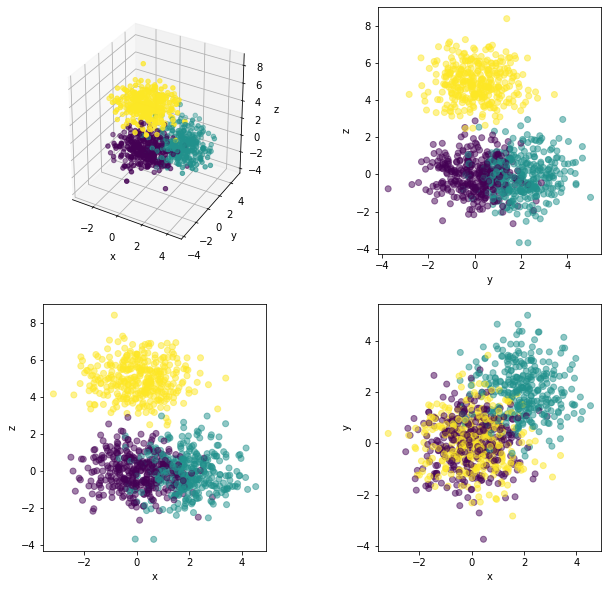

In [181]:
import mpl_toolkits.mplot3d.axes3d

def plot_3d(data): 
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax = fig.add_subplot(222)
    plt.scatter(data[:,1], data[:,2], c=labels, alpha=0.5)
    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax = fig.add_subplot(223)
    plt.scatter(data[:,0], data[:,2], c=labels, alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax = fig.add_subplot(224)
    plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.subplots_adjust(wspace=0.5)

plot_3d(data)

## PCA 

* Mention LDA

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
view = pca.transform(data)
view.shape

(1000, 2)

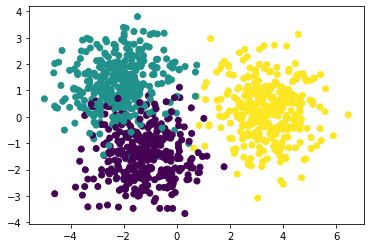

In [10]:
plt.scatter(view[:,0], view[:,1], c=labels)

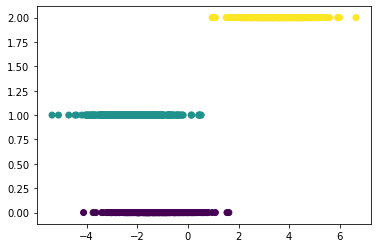

In [189]:
pca = decomposition.PCA(n_components=1)
view = pca.fit_transform(data)
plt.scatter(view, labels, c=labels)

## Iris

### Iris PCA

In [17]:
iris = sklearn.datasets.load_iris()
data = iris['data']
labels = iris['target']

In [18]:
data.shape

(150, 4)

In [19]:
np.unique(labels)

array([0, 1, 2])

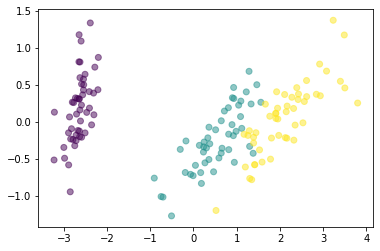

In [20]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)
view = pca.transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

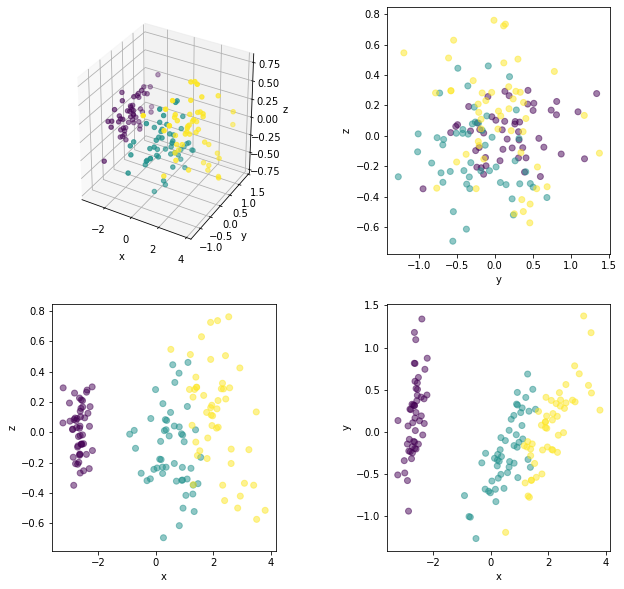

In [21]:
pca = decomposition.PCA(n_components=3)
pca.fit(data)
view = pca.transform(data)
plot_3d(view)

### Iris t-SNE

In [5]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2).fit_transform(data)

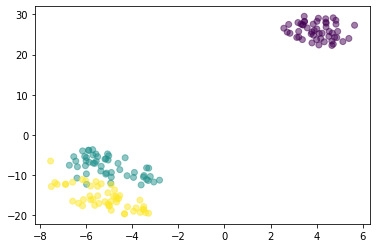

In [23]:
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

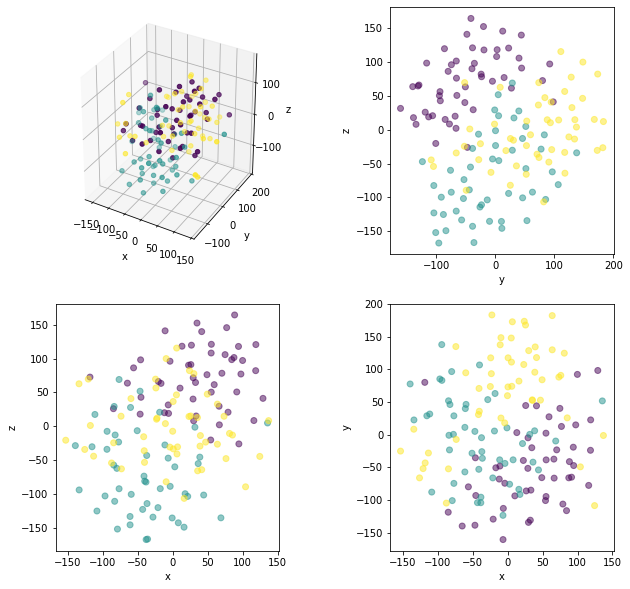

In [24]:
view = TSNE(n_components=3).fit_transform(data)
plot_3d(view)

## Wine


In [151]:
wine = sklearn.datasets.load_wine()
data = wine['data']
labels = wine['target']

### Wine PCA

Describe: 

* labels 
* features 

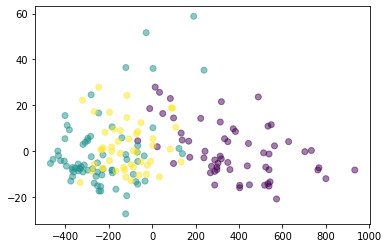

In [152]:
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

### Wine t-SNE

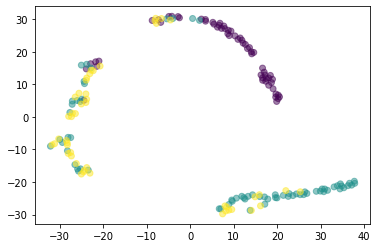

In [168]:
view = TSNE(n_components=2, perplexity=10).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

We see that two categories are very different, and that one sits in the middle. 

Exercise: 

* tune perplexity

## MNIST

In [139]:
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [169]:
raw_data.shape 

(70000, 784)

In [170]:
raw_labels.shape

(70000,)

In [171]:
nsamples = 5000
data = raw_data[:nsamples] / 255.
labels = raw_labels[:nsamples].astype('int')
images = data.reshape(data.shape[0], 28, 28)

In [172]:
data.max()

1.0

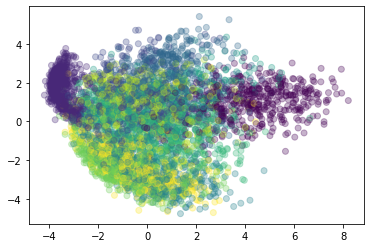

In [173]:
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

### t-SNE

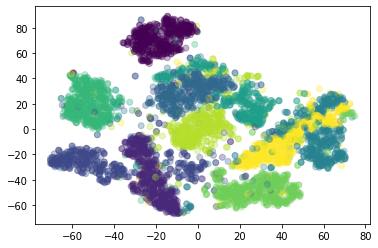

In [174]:
view = TSNE(n_components=2).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

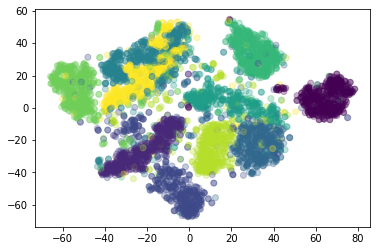

In [179]:
view = TSNE(n_components=2, perplexity=50).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

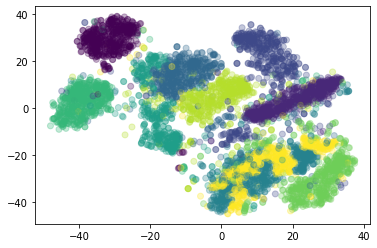

In [177]:
view = TSNE(n_components=2, perplexity=100).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

* Discuss t-SNE complexity. 
* Mention dimensionality reduction with PCA before t-SNE and timeit
* Mention RAPIDS. Try it? 

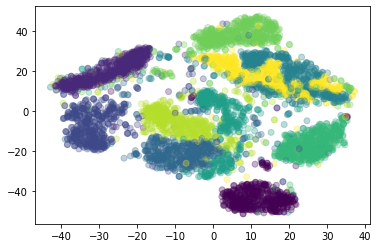

In [178]:
pca = decomposition.PCA(n_components=50)
inter_view = pca.fit_transform(data)
view = TSNE(n_components=2, perplexity=100).fit_transform(inter_view)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

## Bokeh / holoviews interactive visualization

In [103]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [104]:
import pandas as pd
import numpy as np
df = pd.DataFrame(view, columns=['x','y'])
df['label'] = labels.astype('str')
df

,x,y,label
0,-5.266764,-22.566324,5
1,5.818425,-74.178490,0
2,-67.827904,12.722872,4
3,30.572529,64.429771,1
4,-28.444056,17.043850,9
...,...,...,...
9995,-12.339287,-19.157013,5
9996,3.672228,-3.471479,8
9997,-31.426918,-43.042919,6
9998,-29.811230,13.943046,9


In [105]:
from bokeh.models import HoverTool
hover = HoverTool(
    tooltips = [('label','@label'),
               ('index', '$index')]
)
fig_scat = figure(tools=[hover, 'box_zoom', 'crosshair', 'undo'])
source = ColumnDataSource(df)


In [106]:
from bokeh.transform import linear_cmap
from bokeh.palettes import Plasma256 as palette
mapper = linear_cmap('label', palette, 0, 10)

In [107]:
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
palette = d3['Category10'][10]
cmap = CategoricalColorMapper(
    factors=df['label'].unique(),
    palette=palette
)


In [108]:
fig_scat.scatter(
    x='x', y='y', alpha=0.5, 
    color={'field': 'label', 'transform': cmap}, 
    source=source
)

GlyphRenderer(id='1249', ...)

In [109]:
from bokeh.layouts import row

In [110]:
show(fig_scat)

In [111]:
def plot_images(indices): 
    if len(indices)>6:
        print('please provide at most 6 indices')
        return
    fig = plt.figure(dpi=150)
    for i, index in enumerate(indices):
        fig.add_subplot(2, 3, i+1)
        plt.imshow(images[index])
        plt.title(labels[index])

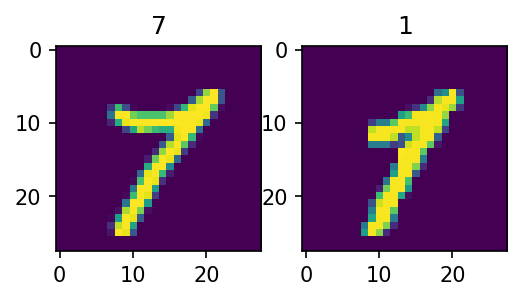

In [116]:
plot_images([2609, 2426])

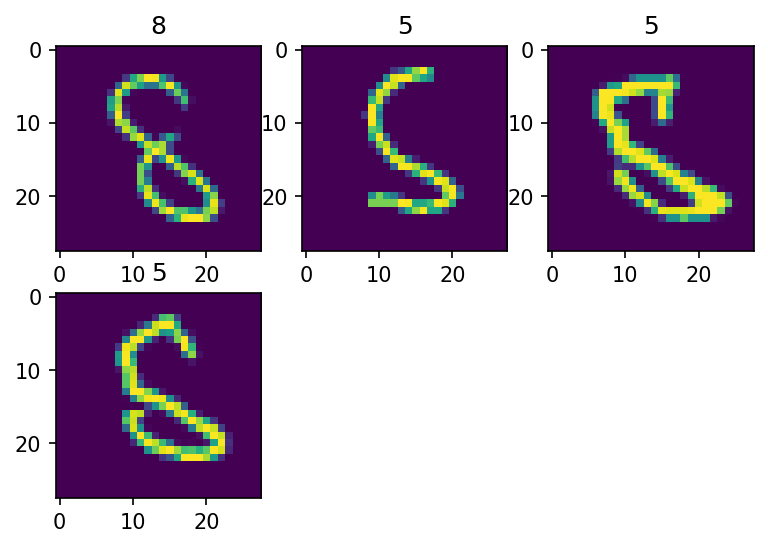

In [121]:
plot_images([5078, 4562, 2622, 9344])